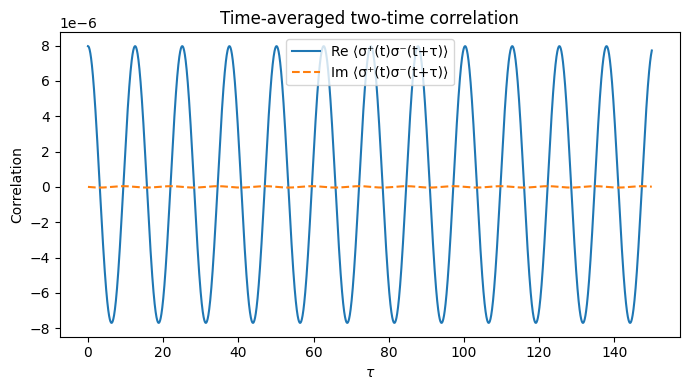

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#Parameters 
tau_decay = 0.05
k = np.pi / 2 #Fixed momentum k
A0 = 0.2
omega = 0.501

Epk = 1.0
dEpk = 0.6
App = 0.2

#Drive
def A_t(t):
    return A0 * np.sin(omega * t)

def hz(t):
    A = A_t(t)
    return (
        Epk
        - dEpk * np.cos(k) * np.sin(A)
        - 2 * Epk * App * (1 - np.cos(A))
    )

def hy(t):
    A = A_t(t)
    return (
        dEpk * np.sin(k) * (1 - np.cos(A))
        - 2 * Epk * App * np.sin(A)
    )

#Bloch matrix
def B_matrix(t):
    return np.array([
        [-(1/tau_decay + 2j*hz(t)), 0.0, hy(t)],
        [0.0, -(1/tau_decay - 2j*hz(t)), hy(t)],
        [-2*hy(t), -2*hy(t), -2/tau_decay]
    ], dtype=complex)

b1 = np.array([0.0, 0.0, -2/tau_decay], dtype=complex)

#ODE wrapper
def odes_real(t, y):
    y_c = y[:3] + 1j*y[3:]
    dydt = B_matrix(t) @ y_c + b1
    return np.concatenate([dydt.real, dydt.imag])

#steady state ⟨σ⟩
c0 = np.array([0.0, 0.0, -1.0], dtype=complex)
y0 = np.concatenate([c0.real, c0.imag])

T = 75
t_eval = np.linspace(0, T, 6000)

sol = solve_ivp(
    odes_real, [0, T], y0,
    t_eval=t_eval, rtol=1e-9, atol=1e-12
)

c = sol.y[:3] + 1j*sol.y[3:]
sigma_m = c[0]
sigma_p = c[1]
sigma_z = c[2]
t = sol.t

#keep one steady-state period
T_drive = 2*np.pi / omega
t0 = T - T_drive
mask_t = t >= t0

t_vals = t[mask_t]
sigma_p_vals = sigma_p[mask_t]
sigma_z_vals = sigma_z[mask_t]

#evolve in τ
tau_max = 150
tau_eval = np.linspace(0, tau_max, 4000)

C_tau = []

for ti, sp, sz in zip(t_vals, sigma_p_vals, sigma_z_vals):

    #two-time correlation and modified initial condition at τ=0
    C0 = np.array([
        0.5 * (1 + sz),   # <σ+σ->
        0.0,              # <σ+σ+>
        -sp               # <σ+σz>
    ], dtype=complex)

    y0_tau = np.concatenate([C0.real, C0.imag])

#evolve in τ
    def corr_odes(tau, y):
        y_c = y[:3] + 1j*y[3:]
        dydt = B_matrix(ti + tau) @ y_c + np.array([0, 0, -2/tau_decay * sp])
        return np.concatenate([dydt.real, dydt.imag])

    sol_tau = solve_ivp(
        corr_odes, [0, tau_max], y0_tau,
        t_eval=tau_eval, rtol=1e-8, atol=1e-11
    )

    C = sol_tau.y[:3] + 1j*sol_tau.y[3:]
    C_tau.append(C[0])   # <σ+(t) σ-(t+τ)>

C_tau = np.array(C_tau)

#time-averaged correlation
C_avg = np.mean(C_tau, axis=0)

# Plot result
plt.figure(figsize=(7,4))
plt.plot(tau_eval, C_avg.real, label='Re ⟨σ⁺(t)σ⁻(t+τ)⟩')
plt.plot(tau_eval, C_avg.imag, '--', label='Im ⟨σ⁺(t)σ⁻(t+τ)⟩')
plt.xlabel(r'$\tau$')
plt.ylabel('Correlation')
plt.title('Time-averaged two-time correlation')
plt.legend()
plt.tight_layout()
plt.show()


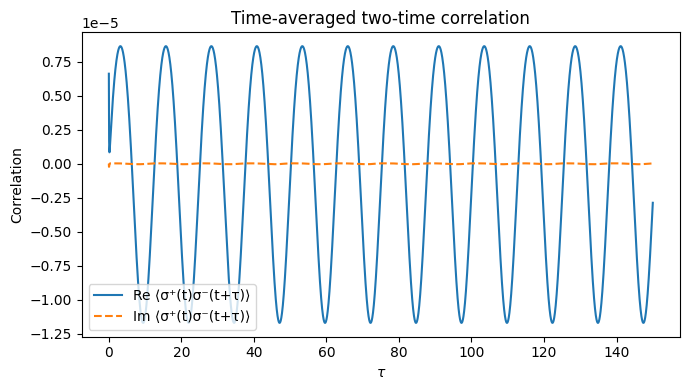

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#Parameters 
tau_decay = 0.05
k = np.pi / 2 #Fixed momentum k
A0 = 0.2
omega = 0.501

Epk = 1.0
dEpk = 0.6
App = 0.2

#Drive
def A_t(t):
    return A0 * np.sin(omega * t)

def hz(t):
    A = A_t(t)
    return (
        Epk
        - dEpk * np.cos(k) * np.sin(A)
        - 2 * Epk * App * (1 - np.cos(A))
    )

def hy(t):
    A = A_t(t)
    return (
        dEpk * np.sin(k) * (1 - np.cos(A))
        - 2 * Epk * App * np.sin(A)
    )

#Bloch matrix
def B_matrix(t):
    return np.array([
        [-(1/tau_decay + 2j*hz(t)), 0.0, hy(t)],
        [0.0, -(1/tau_decay - 2j*hz(t)), hy(t)],
        [-2*hy(t), -2*hy(t), -2/tau_decay]
    ], dtype=complex)

b1 = np.array([0.0, 0.0, -2/tau_decay], dtype=complex)

#ODE wrapper
def odes_real(t, y):
    y_c = y[:3] + 1j*y[3:]
    dydt = B_matrix(t) @ y_c + b1
    return np.concatenate([dydt.real, dydt.imag])

#steady state ⟨σ⟩
c0 = np.array([0.0, 0.0, -1.0], dtype=complex)
y0 = np.concatenate([c0.real, c0.imag])

T = 80
t_eval = np.linspace(0, T, 6000)

sol = solve_ivp(
    odes_real, [0, T], y0,
    t_eval=t_eval, rtol=1e-9, atol=1e-12
)

c = sol.y[:3] + 1j*sol.y[3:]
sigma_m = c[0]
sigma_p = c[1]
sigma_z = c[2]
t = sol.t

#keep one steady-state period
T_drive = 2*np.pi / omega
t0 = T - T_drive
mask_t = t >= t0

t_vals = t[mask_t]
sigma_p_vals = sigma_p[mask_t]
sigma_z_vals = sigma_z[mask_t]

#keeping only the last 10 elements 
t_vals = t_vals[-10:]
sigma_p_vals = sigma_p_vals[-10:]
sigma_z_vals = sigma_z_vals[-10:]

#evolve in τ
tau_max = 150
tau_eval = np.linspace(0, tau_max, 4000)

C_tau = []

for ti, sp, sz in zip(t_vals, sigma_p_vals, sigma_z_vals):

    #two-time correlation and modified initial condition at τ=0
    C0 = np.array([
        0.5 * (1 + sz),   # <σ+σ->
        0.0,              # <σ+σ+>
        -sp               # <σ+σz>
    ], dtype=complex)

    y0_tau = np.concatenate([C0.real, C0.imag])

#evolve in τ
    def corr_odes(tau, y):
        y_c = y[:3] + 1j*y[3:]
        dydt = B_matrix(tau) @ y_c + np.array([0, 0, -2/tau_decay * sp])
        return np.concatenate([dydt.real, dydt.imag])

    sol_tau = solve_ivp(
        corr_odes, [0, tau_max], y0_tau,
        t_eval=tau_eval, rtol=1e-8, atol=1e-11
    )

    C = sol_tau.y[:3] + 1j*sol_tau.y[3:]
    C_tau.append(C[0])   # <σ+(t) σ-(t+τ)>

C_tau = np.array(C_tau, dtype = complex)

#time-averaged correlation
C_avg = np.mean(C_tau, axis=0)

# Plot result
plt.figure(figsize=(7,4))
plt.plot(tau_eval, C_avg.real, label='Re ⟨σ⁺(t)σ⁻(t+τ)⟩')
plt.plot(tau_eval, C_avg.imag, '--', label='Im ⟨σ⁺(t)σ⁻(t+τ)⟩')
plt.xlabel(r'$\tau$')
plt.ylabel('Correlation')
plt.title('Time-averaged two-time correlation')
plt.legend()
plt.tight_layout()
plt.show()

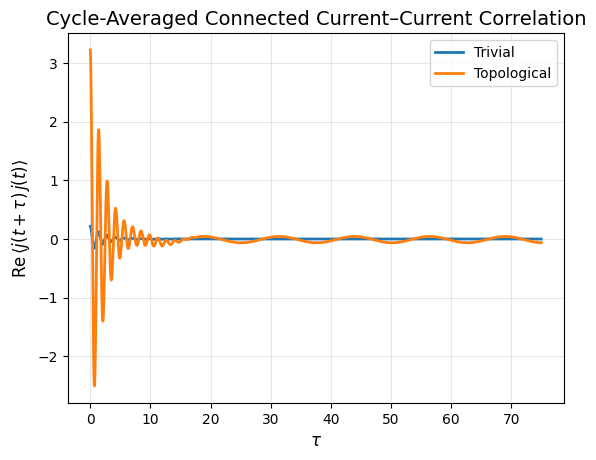

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

class SSHCurrentCorrelation:
#parameters 
    def __init__(
        self,
        t1=2.0,
        t2=1.0,
        A=0.2,
        omega0=0.501,
        tau_diss=1.5,
        k=np.pi/2): #fixed momentum k

        #storage
        self.t1 = t1
        self.t2 = t2
        self.A = A
        self.omega0 = omega0
        self.tau_diss = tau_diss
        self.k = k
        self.T = 2*np.pi / omega0
        self.compute_berry_connection()
#time-dependent drive A(t) = Asin(omega*t)
    def A_field(self, t):
        return self.A * np.sin(self.omega0 * t)
    def E_plus(self):
        return np.sqrt(
            self.t1**2 + self.t2**2 +
            2*self.t1*self.t2*np.cos(self.k))
#slope of band
    def dE_dk(self):
        return -self.t1*self.t2*np.sin(self.k) / self.E_plus()
    def compute_berry_connection(self):
        cosk = np.cos(self.k)
        num = self.t2 * (self.t2 + self.t1*cosk)
        den = self.t1**2 + self.t2**2 + 2*self.t1*self.t2*cosk
        self.A_pp = 0.5 * num / den
#Build of 2x2 time-dependent hamiltonian at time t
    def H_matrix(self, t):
        A = self.A_field(t)
        E = self.E_plus()
        dE = self.dE_dk()

        hz = E - dE*np.sin(A) - 2*E*self.A_pp*(1 - np.cos(A))
        hy = dE*(1 - np.cos(A)) - 2*E*self.A_pp*np.sin(A)

        return np.array([[hz, -1j*hy],
                         [1j*hy, -hz]], dtype=complex)

    def current_operator(self, t):
        A = self.A_field(t)
        denom = self.E_plus()

        j_pp = self.t2*(self.t2*np.sin(A) - self.t1*np.sin(self.k - A)) / denom
        j_mm = -j_pp
        j_pm = -1j*self.t2*(self.t2*np.cos(A) + self.t1*np.cos(self.k - A)) / denom
        j_mp = -j_pm

        return np.array([[j_pp, j_pm],
                         [j_mp, j_mm]], dtype=complex)
#
    def dissipator(self, rho):
        sm = np.array([[0,0],[1,0]], dtype=complex)
        sp = np.array([[0,1],[0,0]], dtype=complex)
        gamma = 1 / self.tau_diss
        return gamma * (sm@rho@sp - 0.5*(sp@sm@rho + rho@sp@sm))

    def rho_dot(self, t, rho_vec):
        rho = rho_vec.reshape((2,2))
        H = self.H_matrix(t)
        comm = -1j*(H@rho - rho@H)
        return (comm + self.dissipator(rho)).flatten()
#take steady state
    def steady_state(self, t_warmup=200.0):
        rho0 = np.array([[0,0],[0,1]], dtype=complex).flatten()
        sol = solve_ivp(
            self.rho_dot,
            [0, t_warmup],
            rho0,
            rtol=1e-8,
            atol=1e-10
        )
        return sol.y[:,-1].reshape((2,2))
    
    def current_correlation_cycle_avg(
        self,
        tau_max=75.0,
        n_tau=1500,
        n_phase=8
    ):
        rho_ss = self.steady_state()
        tau_grid = np.linspace(0, tau_max, n_tau)
        C_avg = np.zeros(n_tau, dtype=complex)

        t_phases = np.linspace(0, self.T, n_phase, endpoint=False)

        for t0 in t_phases:
            j_t = self.current_operator(t0)
            j_t_exp = np.trace(j_t @ rho_ss)
            rho0 = (j_t @ rho_ss).flatten()

            def rho_tau_dot(tau, rho_vec):
                rho = rho_vec.reshape((2,2))
                H = self.H_matrix(t0 + tau)
                comm = -1j*(H@rho - rho@H)
                return (comm + self.dissipator(rho)).flatten()

            sol = solve_ivp(
                rho_tau_dot,
                [0, tau_max],
                rho0,
                t_eval=tau_grid,
                rtol=1e-7,
                atol=1e-9
            )

            for i, tau in enumerate(tau_grid):
                rho_tau = sol.y[:,i].reshape((2,2))
                j_tau = self.current_operator(t0 + tau)
                j_tau_exp = np.trace(j_tau @ rho_ss)
                C_avg[i] += np.trace(j_tau @ rho_tau) - j_tau_exp*j_t_exp

        return tau_grid, C_avg / n_phase

#triv case 
ssh_triv = SSHCurrentCorrelation(t1=2.0, t2=1.0)
#run tau values, cycle averaged connected correlation (triv)
tau_triv, Cjj_triv = ssh_triv.current_correlation_cycle_avg()
Cjj_triv = Cjj_triv - np.mean(Cjj_triv[-200:])

#topological case 
ssh_topo = SSHCurrentCorrelation(t1=1.0, t2=2.0)
#run tau values, cycle averaged connected correlation (topological)
tau_topo, Cjj_topo = ssh_topo.current_correlation_cycle_avg()
Cjj_topo = Cjj_topo - np.mean(Cjj_topo[-200:])

plt.plot(tau_triv, Cjj_triv.real, label='Trivial', linewidth=2)
plt.plot(tau_topo, Cjj_topo.real, label='Topological', linewidth=2)
plt.xlabel(r'$\tau$', fontsize=12)
plt.ylabel(r'$\mathrm{Re}\,\langle j(t+\tau)\,j(t)\rangle$', fontsize=12)
plt.title('Cycle-Averaged Connected Current–Current Correlation', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


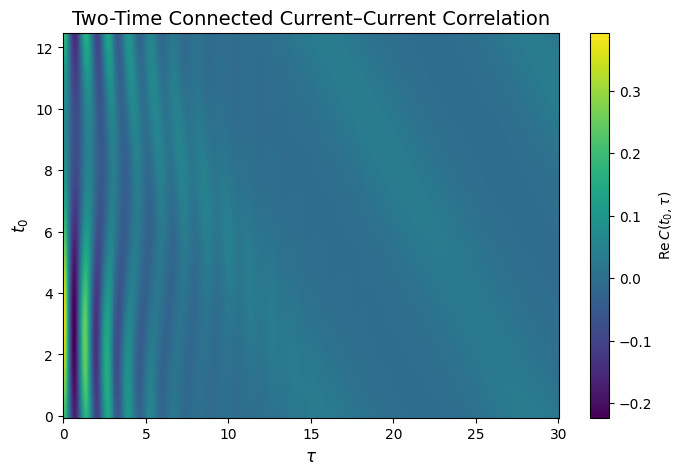

In [ ]:
ssh = SSHCurrentCorrelation(t1=2.0, t2=1.0)  #trivial case

tau_max = 30.0
n_tau = 500
n_phase = 100 

rho_ss = ssh.steady_state()
tau_grid = np.linspace(0, tau_max, n_tau)
t_phases = np.linspace(0, ssh.T, n_phase, endpoint=False)

C_matrix = np.zeros((n_phase, n_tau), dtype=complex)

# Compute C(t0, tau)
for i, t0 in enumerate(t_phases):
    j_t = ssh.current_operator(t0)
    j_t_exp = np.trace(j_t @ rho_ss)
    rho0 = (j_t @ rho_ss).flatten()

    def rho_tau_dot(tau, rho_vec):
        rho = rho_vec.reshape((2,2))
        H = ssh.H_matrix(t0 + tau)
        comm = -1j*(H@rho - rho@H)
        return (comm + ssh.dissipator(rho)).flatten()

    sol = solve_ivp(
        rho_tau_dot,
        [0, tau_max],
        rho0,
        t_eval=tau_grid,
        rtol=1e-7,
        atol=1e-9
    )

    for j, tau in enumerate(tau_grid):
        rho_tau = sol.y[:,j].reshape((2,2))
        j_tau = ssh.current_operator(t0 + tau)
        j_tau_exp = np.trace(j_tau @ rho_ss)
        C_matrix[i,j] = np.trace(j_tau @ rho_tau) - j_tau_exp*j_t_exp

plt.figure(figsize=(8,5))
plt.pcolormesh(tau_grid, t_phases, C_matrix.real, shading='auto', cmap='viridis')
plt.colorbar(label=r'Re$\,C(t_0, \tau)$')
plt.xlabel(r'$\tau$', fontsize=12)
plt.ylabel(r'$t_0$', fontsize=12)
plt.title('Two-Time Connected Current–Current Correlation', fontsize=14)
plt.show()
